## Q* Learning with FrozenLake 4x4

In this Notebook, we'll implement an agent <b>that plays FrozenLake.</b>

![alt text](http://simoninithomas.com/drlc/Qlearning/frozenlake4x4.png)

Step -1: Install the dependencies on Google Colab

In [1]:
!pip install numpy
!pip install gym

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Step 0: Import the dependencies 📚
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers

In [24]:
import numpy as np
import gym
import random

## Step 1: Create the environment
- Here we'll create the FrozenLake 8x8 environment.
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>
- In our case we choose to use Frozen Lake.

In [25]:
env = gym.make("FrozenLake-v1")

## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [26]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [27]:
# Create our Q table with state_size rows and action_size columns (64x4)
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 3: Create the hyperparameters
- Here, we'll specify the hyperparameters

In [28]:
total_episodes = 20000       # Total episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.7                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.5            # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:
  ![alt text](http://simoninithomas.com/drlc/Qlearning//qtable_algo.png)

In [29]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            #print("action random", action)


        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)


print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 5: Use our Q-table to play FrozenLake ! 👾
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

In [30]:
env.reset()

for episode in range(10):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)

        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            #env.render()
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            # We print the number of step it took.
            print("Number of steps", step)

            break
        state = new_state
env.close()

****************************************************
EPISODE  0
We fell into a hole ☠️
Number of steps 28
****************************************************
EPISODE  1
We fell into a hole ☠️
Number of steps 9
****************************************************
EPISODE  2
We fell into a hole ☠️
Number of steps 23
****************************************************
EPISODE  3
We fell into a hole ☠️
Number of steps 2
****************************************************
EPISODE  4
We fell into a hole ☠️
Number of steps 32
****************************************************
EPISODE  5
We fell into a hole ☠️
Number of steps 18
****************************************************
EPISODE  6
We fell into a hole ☠️
Number of steps 9
****************************************************
EPISODE  7
We fell into a hole ☠️
Number of steps 6
****************************************************
EPISODE  8
We fell into a hole ☠️
Number of steps 5
***************************************************

## Step 4: The SARSA learning algorithm 🧠
- Now we implement the SARSA learning algorithm:
![alt text](https://tcnguyen.github.io/reinforcement_learning/images/SARSA_algo.png)


nitialize state_action_vals (an array of shape states x actions (16 x 4))
Repeat for each episode:
    Select action A and state S (epsilon-greedy)
    Repeat for each step:
        Perform action A, observe reward R and next state S'
        Choose next action A' using the current policy Q (epsilon-greedy)
        delta = R + gamma * state_action_vals[S'][A'] - state_action_vals[S][A]
        state_action_vals[S][A] = state_action_vals[S][A] + alpha * delta
        S=S', A=A'
until S is terminal

In [ ]:
import random

import gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make('FrozenLake-v1')
print("Action space:", env.action_space)
#print("State space:", env.env.nS)

Action space: Discrete(4)


In [ ]:
env.env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [ ]:
state_size = 16
action_space = env.action_space.n
alpha = 0.5
gamma = 0.7
state_action_vals = np.random.randn(state_size, action_space)
policy = np.zeros(state_size, dtype=int)
episodes = 20000
eps = 1
test_episodes = 50
test_every = 1000
test_episode = []
rewards = []

In [ ]:
def select_action(state, eps):
    sample = np.random.uniform()
    if sample < eps:
        return env.action_space.sample()
    else:
        return state_action_vals[state].argmax()

In [ ]:
for ep in range(episodes):
    state = env.reset()
    action = select_action(state, eps)
    done = False
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = select_action(state, eps)

        action_value = state_action_vals[state, action]
        next_action_value = state_action_vals[next_state, next_action]
        delta = reward + gamma * next_action_value - action_value
        state_action_vals[state, action] += alpha * delta
        state, action = next_state, next_action

    if ep % test_every == 0:
        total_rewards = 0
        for _ in range(test_episodes):
            done = False
            state = env.reset()
            while not done:
                action = state_action_vals[state].argmax()
                state, reward, done, _ = env.step(action)
                total_rewards += reward
        rewards.append(total_rewards / test_episodes)
        test_episode.append(ep)

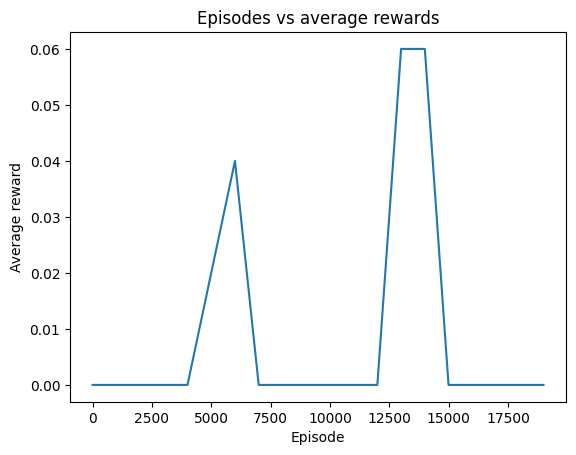

In [ ]:
fig, ax = plt.subplots()
ax.plot(test_episode, rewards)
ax.set_title('Episodes vs average rewards')
ax.set_xlabel('Episode')
_ = ax.set_ylabel('Average reward')

As you can see the policy has not converged and the average reward is nowhere near what is required. As the number of episodes $n \rightarrow \infty$, the policy will converge to an optimal policy according to the law of large numbers.


### Example
This code implements Q-learning to solve the CartPole-v1 environment from OpenAI Gym, where the goal is to balance a pole on a cart by applying left or right forces.


The provided code demonstrates a basic implementation of Q-learning with function approximation (discretization of state space) to solve the CartPole-v1 environment. It follows the standard Q-learning algorithm:
- Initializes the Q-table.
- Implements Q-learning updates based on observed state transitions and rewards.
- Uses an ε-greedy policy for balancing exploration and exploitation.
- Decays the exploration rate over episodes.
- Collects and plots rewards to visualize the agent's learning progress.

Episode 0: Total Reward = 18.0
Episode 100: Total Reward = 17.0
Episode 200: Total Reward = 26.0
Episode 300: Total Reward = 10.0
Episode 400: Total Reward = 200.0
Episode 500: Total Reward = 200.0
Episode 600: Total Reward = 200.0
Episode 700: Total Reward = 34.0
Episode 800: Total Reward = 182.0
Episode 900: Total Reward = 200.0


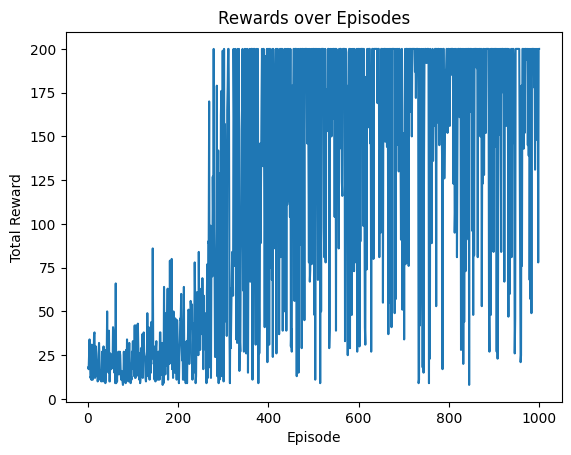

Total reward for test episode: 233.0


In [19]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Parameters for Q-learning
num_episodes = 1000
max_steps_per_episode = 200
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

# Discretization parameters for state space
num_buckets = (1, 1, 6, 12)  # Number of buckets for each feature in state space
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-np.radians(50), np.radians(50)]

# Initialize Q-table
action_space_size = env.action_space.n
q_table = np.zeros(num_buckets + (action_space_size,))

# Function to discretize the continuous state into discrete buckets
def discretize_state(state):
    discretized_state = []
    for i in range(len(state)):
        scaling = (state[i] + abs(state_bounds[i][0])) / (state_bounds[i][1] - state_bounds[i][0])
        bucket = int(round((num_buckets[i] - 1) * scaling))
        discretized_state.append(min(num_buckets[i] - 1, max(0, bucket)))
    return tuple(discretized_state)

# List to store rewards
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()

        # Take action and observe next state and reward
        new_state, reward, done, info = env.step(action)
        new_state = discretize_state(new_state)

        # Update Q-table
        best_next_action = np.argmax(q_table[new_state])
        q_table[state + (action,)] += learning_rate * (reward + discount_rate * q_table[new_state + (best_next_action,)] - q_table[state + (action,)])

        # Transition to next state
        state = new_state
        total_reward += reward

        if done:
            break

    # Append total reward of current episode
    rewards_all_episodes.append(total_reward)

    # Decay exploration rate
    exploration_rate = min_exploration_rate + \
                        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    # Print episode information
    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}")

# Plotting rewards over episodes
plt.plot(np.arange(1, num_episodes + 1), rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()

# Test the trained agent
state = env.reset()
state = discretize_state(state)
done = False
total_reward = 0

while not done:
    action = np.argmax(q_table[state])
    new_state, reward, done, _ = env.step(action)
    new_state = discretize_state(new_state)
    total_reward += reward
    state = new_state

print(f"Total reward for test episode: {total_reward}")

env.close()



### Code Explanation:

1. **Import Libraries**:
   - `import gym`: Imports the OpenAI Gym library, which provides environments for reinforcement learning.
   - `import numpy as np`: Imports NumPy library for numerical computations.
   - `import matplotlib.pyplot as plt`: Imports matplotlib for data visualization.

2. **Create Environment**:
   - `env = gym.make('CartPole-v1')`: Creates the CartPole environment with version 'v1'.

3. **Q-Learning Parameters**:
   - `num_episodes`: Number of episodes used for training.
   - `max_steps_per_episode`: Maximum number of steps allowed per episode.
   - `learning_rate`: Learning rate (α) for updating Q-values.
   - `discount_rate`: Discount factor (γ) for future rewards.
   - `exploration_rate`: Initial exploration rate (ε) for ε-greedy policy.
   - `max_exploration_rate`: Maximum exploration rate.
   - `min_exploration_rate`: Minimum exploration rate.
   - `exploration_decay_rate`: Exploration rate decay factor.

4. **Discretization Parameters for State Space**:
   - `num_buckets`: Number of discrete buckets for each feature in the state space.
   - `state_bounds`: Bounds for each state variable (observation space), adjusted based on the environment's specifications.

5. **Initialize Q-Table**:
   - `action_space_size`: Number of actions in the action space.
   - `q_table`: Initialize the Q-table with zeros, shaped by `num_buckets` and `action_space_size`.

6. **Discretize State Function**:
   - `discretize_state(state)`: Converts continuous `state` into discrete buckets using the specified `num_buckets` and `state_bounds`.

7. **Q-Learning Loop**:
   - Iterates through `num_episodes`:
     - Resets the environment (`state = env.reset()`).
     - Discretizes the initial state (`state = discretize_state(state)`).
     - Executes steps within each episode:
       - Implements an ε-greedy policy for action selection.
       - Observes the next state and reward after taking an action.
       - Updates the Q-table using the Q-learning update rule.
       - Transitions to the next state and accumulates rewards until the episode terminates (`done=True`).

8. **Exploration Rate Decay**:
   - Decays the exploration rate (`exploration_rate`) over episodes to gradually shift from exploration to exploitation.

9. **Data Collection**:
   - Collects the total reward for each episode (`rewards_all_episodes`) for analysis and visualization.

10. **Plotting Rewards**:
    - Plots the rewards accumulated over episodes using Matplotlib.

11. **Testing the Trained Agent**:
    - Evaluates the trained agent by running one episode without exploration.
    - Calculates the total reward obtained during the test episode.

12. **Close the Environment**:
    - Closes the CartPole environment after training and testing.

# Q-Learning

Q-learning is a model-free, value-based reinforcement learning algorithm that learns an optimal action-value function \( Q(s, a) \) to make decisions in an environment. It is particularly effective for environments with discrete state and action spaces. Q-learning uses the Bellman equation to iteratively update Q-values based on observed transitions and rewards, aiming to maximize the expected cumulative reward.

### Overview of Q-Learning Algorithm

1. **Initialize Q-Table**: Initialize the Q-table \( Q(s, a) \) with zeros or random values for all state-action pairs.

2. **Select Action**: Choose an action \( a \) using an exploration-exploitation strategy (e.g., ε-greedy) based on the current state \( s \).

3. **Take Action and Observe Reward**: Execute the chosen action in the environment and observe the resulting reward \( r \) and the next state \( s' \).

4. **Update Q-Value**: Update the Q-value of the current state-action pair using the Bellman equation:
   \[ Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right] \]
   where:
   - \( \alpha \) (learning rate) controls the rate of learning.
   - \( \gamma \) (discount factor) determines the importance of future rewards.

5. **Repeat**: Repeat steps 2-4 until convergence or a specified number of episodes.

In [33]:
import gym
import numpy as np

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Initialize Q-table with zeros
num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    for step in range(max_steps_per_episode):
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < 0.2:  # Exploration (20% of the time)
            action = env.action_space.sample()
        else:  # Exploitation (80% of the time)
            action = np.argmax(q_table[state])

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)

        # Update Q-table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                                 learning_rate * (reward + discount_factor * np.max(q_table[next_state, :]))

        # Move to next state
        state = next_state

        # Check if episode is done
        if done:
            break

# Test the learned policy
num_episodes_test = 100
total_rewards = 0

for _ in range(num_episodes_test):
    state = env.reset()
    for _ in range(max_steps_per_episode):
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_rewards += reward
        if done:
            break

# Compute average reward
average_reward = total_rewards / num_episodes_test
print("Average reward:", average_reward)

# Close the environment
env.close()


Average reward: 0.0


### Explanation:

- **Initialization**: We initialize the Q-table (`q_table`) with zeros, where each row corresponds to a state and each column corresponds to an action.

- **Q-Learning Parameters**:
  - `learning_rate`: Determines how much the Q-values are updated on each iteration.
  - `discount_factor`: Balances immediate and future rewards (importance of future rewards).
  - `num_episodes`: Number of episodes used for training.
  - `max_steps_per_episode`: Maximum number of steps allowed in each episode.

- **Q-Learning Loop**:
  - We iterate through episodes and for each episode, we reset the environment (`state = env.reset()`).
  - Within each episode, we choose actions based on an ε-greedy policy, update the Q-values using the Bellman equation, and move to the next state until the episode terminates (`done=True`).

- **Testing the Learned Policy**:
  - After training, we evaluate the learned policy by running the agent (`num_episodes_test`) times and computing the average reward obtained.

This example demonstrates a basic implementation of Q-learning for the `FrozenLake-v1` environment using the OpenAI Gym library. You can adjust the hyperparameters and exploration-exploitation strategy (`epsilon-greedy`) based on the specific requirements of your problem domain. Q-learning can be extended to more complex environments and variations (e.g., Deep Q-Networks for high-dimensional state spaces) to solve challenging reinforcement learning tasks.

The REINFORCE algorithm, also known as the Monte Carlo Policy Gradient method, is a popular policy-based reinforcement learning algorithm used for training parameterized policies in environments with discrete or continuous action spaces. It directly learns the policy by optimizing the expected return through gradient ascent.

### Overview of REINFORCE Algorithm

The REINFORCE algorithm operates by estimating the policy gradient using Monte Carlo sampling of complete episodes. It updates the policy parameters in the direction that increases the expected return. Here are the main steps involved:

1. **Initialize Policy Network**: Initialize a parameterized policy network (e.g., a neural network) that maps states to action probabilities.

2. **Collect Trajectories**: Interact with the environment using the current policy to collect trajectories (sequences of states, actions, and rewards) until the end of each episode.

3. **Compute Returns**: For each time step in the trajectory, compute the return \(G_t\), which is the total discounted reward from time step \(t\) until the end of the episode.

4. **Policy Gradient Calculation**:
   - For each time step \(t\) in the trajectory, compute the log probability of the selected action under the current policy.
   - Multiply the log probability by the return \(G_t\), which is the reward obtained after taking that action.
   - Accumulate the policy gradient estimates over all trajectories.

5. **Update Policy Parameters**: Use the collected policy gradient estimates to update the policy parameters via gradient ascent.

In [32]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the Policy Network using a simple feedforward neural network
class PolicyNetwork(tf.keras.Model):
    def __init__(self, state_size, action_size, hidden_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = Dense(hidden_size, activation='relu')
        self.fc2 = Dense(action_size, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

# Function to choose action based on policy probabilities
def choose_action(state, policy_network):
    state = np.expand_dims(state, axis=0)  # Add batch dimension
    logits = policy_network(state)

    # Apply numerical stability adjustment
    epsilon = 1e-6
    logits = logits - np.max(logits)  # Subtract maximum value for numerical stability
    action_probs = np.exp(logits) / (np.sum(np.exp(logits)) + epsilon)  # Softmax with epsilon

    action = np.random.choice(len(action_probs[0]), p=action_probs[0])
    return action

# Function to compute discounted returns
def compute_discounted_returns(rewards, discount_factor):
    discounted_returns = np.zeros_like(rewards)
    cumulative_return = 0.0
    for t in reversed(range(len(rewards))):
        cumulative_return = rewards[t] + discount_factor * cumulative_return
        discounted_returns[t] = cumulative_return
    return discounted_returns

# Hyperparameters
learning_rate = 0.01
discount_factor = 0.99
num_episodes = 1000

# Create the CartPole environment
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Initialize Policy Network
policy_network = PolicyNetwork(state_size, action_size, 32)
optimizer = Adam(learning_rate)

# REINFORCE Training Loop
for episode in range(num_episodes):
    state = env.reset()
    episode_states, episode_actions, episode_rewards = [], [], []

    while True:
        action = choose_action(state, policy_network)
        next_state, reward, done, _ = env.step(action)

        episode_states.append(state)
        episode_actions.append(action)
        episode_rewards.append(reward)

        state = next_state

        if done:
            # Compute discounted returns
            discounted_returns = compute_discounted_returns(episode_rewards, discount_factor)

            # Convert lists to numpy arrays
            episode_states = np.array(episode_states)
            episode_actions = np.array(episode_actions)
            discounted_returns = np.array(discounted_returns)

            with tf.GradientTape() as tape:
                # Compute log probabilities of selected actions
                logits = policy_network(episode_states)
                action_masks = tf.one_hot(episode_actions, action_size)
                log_probs = tf.reduce_sum(action_masks * tf.math.log(logits), axis=1)

                # Compute policy loss
                policy_loss = -tf.reduce_mean(log_probs * discounted_returns)

            # Update policy network
            gradients = tape.gradient(policy_loss, policy_network.trainable_variables)
            optimizer.apply_gradients(zip(gradients, policy_network.trainable_variables))

            break

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}: Average Reward = {sum(episode_rewards)}")

# Close the environment
env.close()


Episode 50: Average Reward = 14.0
Episode 100: Average Reward = 9.0
Episode 150: Average Reward = 18.0
Episode 200: Average Reward = 21.0
Episode 250: Average Reward = 11.0
Episode 300: Average Reward = 21.0
Episode 350: Average Reward = 17.0
Episode 400: Average Reward = 35.0
Episode 450: Average Reward = 13.0
Episode 500: Average Reward = 12.0
Episode 550: Average Reward = 50.0
Episode 600: Average Reward = 13.0
Episode 650: Average Reward = 43.0
Episode 700: Average Reward = 22.0
Episode 750: Average Reward = 19.0
Episode 800: Average Reward = 15.0
Episode 850: Average Reward = 16.0
Episode 900: Average Reward = 44.0
Episode 950: Average Reward = 16.0
Episode 1000: Average Reward = 35.0




### Explanation:

- **Policy Network**: We define a `PolicyNetwork` class as a subclass of `tf.keras.Model` that represents a simple feedforward neural network with two fully connected layers (`Dense`) and softmax activation to output action probabilities given a state.

- **Choosing Actions**: The `choose_action` function samples an action from the policy network's output probabilities using `np.random.choice`.

- **Training Loop**:
  - We run a training loop (`for episode in range(num_episodes)`) to collect trajectories (states, actions, rewards) by interacting with the environment.
  - After each episode, we compute returns (cumulative discounted rewards) and use these to estimate the policy gradient using the REINFORCE algorithm.
  - We compute the policy gradient using TensorFlow's automatic differentiation (`tf.GradientTape`) and update the policy network parameters